In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Caricamento e gestione del dataset sulla fertilità
fertility_ds = pd.read_csv('C:\\Users\\paioc\\PycharmProjects\\SciVis_Project\\resources\\fertility_rate.csv')

fertility_ds = fertility_ds.filter(items=['Country or Area', 'Year(s)', 'Value'])
fertility_ds = fertility_ds[fertility_ds['Year(s)'] >= 1999]
fertility_ds

,Country or Area,Year(s),Value
0,ADB region: Central and West Asia,2023,3.5252
1,ADB region: Central and West Asia,2020,3.6272
2,ADB region: Central and West Asia,2017,3.6671
3,ADB region: Central and West Asia,2014,3.7965
4,ADB region: Central and West Asia,2011,3.9217
...,...,...,...
6098,Zimbabwe,2011,4.1264
6099,Zimbabwe,2008,3.7826
6100,Zimbabwe,2005,3.6933
6101,Zimbabwe,2002,3.9249


In [5]:
fertility_ds_continents = fertility_ds[(fertility_ds['Country or Area'] == 'Asia') | (fertility_ds['Country or Area'] == 'Africa') | (fertility_ds['Country or Area'] == 'Europe') | (fertility_ds['Country or Area'] == 'Northern America') | (fertility_ds['Country or Area'] == 'South America') | (fertility_ds['Country or Area'] == 'Oceania')]
fertility_ds_continents

,Country or Area,Year(s),Value
77,Africa,2023,4.0718
78,Africa,2020,4.2423
79,Africa,2017,4.4822
80,Africa,2014,4.6862
81,Africa,2011,4.8417
82,Africa,2008,4.9677
83,Africa,2005,5.0400
84,Africa,2002,5.1147
85,Africa,1999,5.2480
308,Asia,2023,1.8809


In [6]:
fertility_ds_continents['Country or Area'].unique()

array(['Africa', 'Asia', 'Europe', 'Northern America', 'Oceania',
       'South America'], dtype=object)

Iniziamo con il fare una comparazione fra il 1999 ed il 2023 sulla variazione della fertilità a seconda del continente:

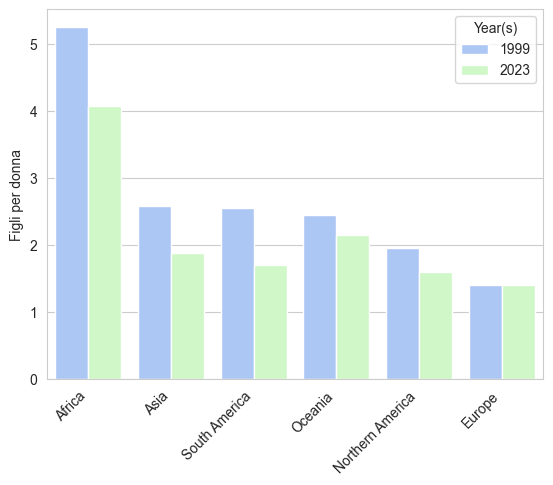

In [29]:
fertility_ds_continents_99and23 = fertility_ds_continents[(fertility_ds_continents['Year(s)'] == 1999) | (fertility_ds_continents['Year(s)'] == 2023)].sort_values(by='Value', ascending=False)
ax = sns.barplot(
    data=fertility_ds_continents_99and23,
    x='Country or Area',
    y='Value',
    hue='Year(s)',
    palette={1999: '#A0C4FF', 2023: '#CAFFBF'}
)
ax.set(xlabel=None)
plt.xticks(rotation=45, ha='right')
ax.set(ylabel='Figli per donna')
plt.show()